In [39]:
import numpy as np
from skimage.io import imread
from skimage.segmentation import slic, find_boundaries
import matplotlib.pyplot as plt
from pathlib import Path

from utils import get_segmentation_object, load_segmentations, plot_boundary, plot_median_color
from skimage.color import label2rgb

In [2]:
images_path = Path('data/images/train')
ground_truth_path = Path('data/groundTruth/train')

In [78]:
img_path = images_path / '12003.jpg'
img = imread(img_path)

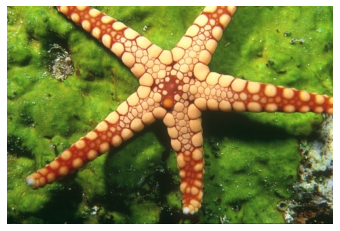

In [4]:
plt.imshow(img)
plt.axis("off")
plt.show()

### Retrieve the ground truth data

In [5]:
ground_truth = get_segmentation_object(ground_truth_path/"12003.mat")


In [9]:
list_gt_segmentations, list_gt_boundaries = load_segmentations(ground_truth)
gt_seg, gt_bound = list_gt_segmentations[0], list_gt_boundaries[0]

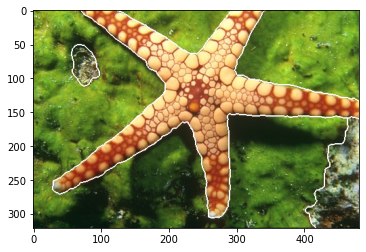

In [10]:
img_plot = np.where(gt_bound[:, :, None], 255, img)
plt.imshow(img_plot)

In [11]:
from skimage.transform import rescale

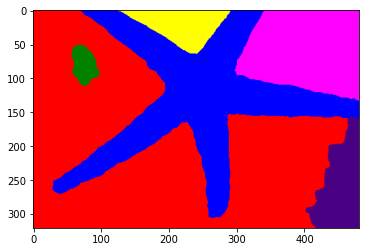

In [64]:
plt.imshow(label2rgb(gt_seg))

In [66]:
np.unique(gt_seg, return_counts=True)

(array([1, 2, 3, 4, 5, 6], dtype=uint16),
 array([80095, 39956,  5646, 19146,  1714,  7844]))

In [70]:
img_scaled = rescale(img, .3, channel_axis=-1)
gt_seg_float = gt_seg.astype(float)
gt_seg_scaled = rescale(gt_seg_float, .3, order=0)
# gt_seg_scaled = (gt_seg_scaled / gt_seg_scaled.min()).astype(int)
gt_bound_scaled = find_boundaries(gt_seg_scaled)

In [73]:
from PIL import Image

In [86]:
481 * .3,

(144.29999999999998,)

In [ ]:
def rescale_segmentation(segmentation, ratio):
    new_size = int(max(segmentation.shape) * ratio)
    im = Image.fromarray(segmentation.astype(np.uint16))
    im.thumbnail((new_size, new_size), resample=Image.NEAREST)
    return np.array(im)

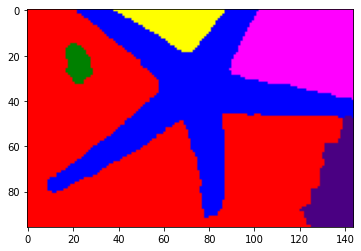

In [110]:
im = Image.fromarray(gt_seg.astype(np.uint16))
im.thumbnail((144, 144), resample=Image.NEAREST)
gt_seg_scaled = np.array(im)
plt.imshow(label2rgb(gt_seg_scaled))

In [114]:
gt_seg_scaled.shape

(96, 144)

In [71]:
np.unique(gt_seg_scaled.astype(np.uint8), return_counts=True)

(array([1, 2, 3, 4, 5, 6], dtype=uint8),
 array([7794, 3078,  565, 1630,  175,  582]))

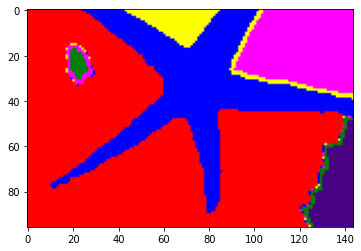

In [72]:
plt.imshow(label2rgb(gt_seg_scaled / gt_seg_scaled.min()))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


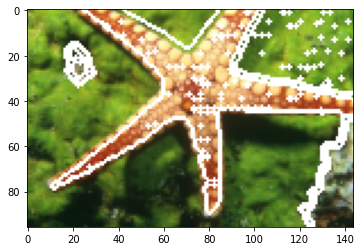

In [36]:
plt.imshow(plot_boundary(img_scaled, gt_bound_scaled))

### Use a dummy pixeliser

In [8]:
from pixelisers import BlockPixeliser

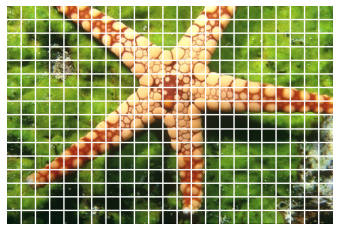

In [9]:
block_pixeliser = BlockPixeliser()

block_segmentation = block_pixeliser.pixelate(img)

block_boundaries = find_boundaries(block_segmentation,)

plt.imshow(np.where(block_boundaries[:, :, None], 255, img))
plt.axis("off")
plt.show()

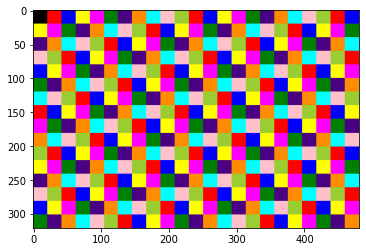

In [11]:
plt.imshow(label2rgb(block_segmentation))

(-0.5, 480.5, 320.5, -0.5)

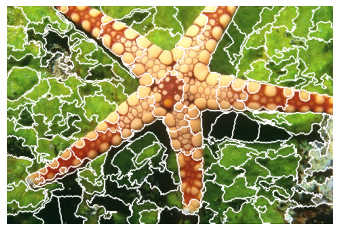

In [12]:
segments_slic = slic(img, n_segments=200, compactness=10)
boundaries_slic = find_boundaries(segments_slic)

plt.imshow(np.where(boundaries_slic[:, :, None], 255, img))
plt.axis("off")

### Now some metrics

In [13]:
from metrics import compactness, undersegmentation_error, boundary_recall

In [18]:
# This one is "unsupervised".
compactness(segments_slic, boundaries_slic)

0.4420654458300409

In [19]:
undersegmentation_error(segments_slic, ground_truth_segmentation)

0.2897714393041495

In [21]:

boundary_recall(boundaries_slic, gt_boundaries_skimage)

0.8168824163969794